In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from functools import partial

In [2]:
out=pt.import_excel('PythonInput_OlLiq_Thermometers_Putirka.xlsx', sheet_name="Pu2017_2021_NiThermometers")
my_input=out['my_input']
myOls2=out['Ols']
myLiquids2=out['Liqs']

In [3]:
T_pyy_match=pt.calculate_ol_liq_temp_matching(liq_comps=myLiquids2, ol_comps=myOls2, equationT="T_Pu2017")

Considering N=5 Ol & N=5 Liqs, which is a total of N=25 Liq-Ol pairs, be patient if this is >>1 million!


In [4]:
T_pyy=pt.calculate_ol_liq_temp(liq_comps=myLiquids2, ol_comps=myOls2, equationT="T_Pu2017", P=0)-273.15
T_pyy

Youve selected a P-independent function


,T_K_calc,Kd (Fe-Mg) Meas
0,1183.209886,-272.908818
1,1177.852143,-272.965682
2,1148.741156,-272.995609
3,1165.235948,-273.026287
4,1078.424411,-272.989939


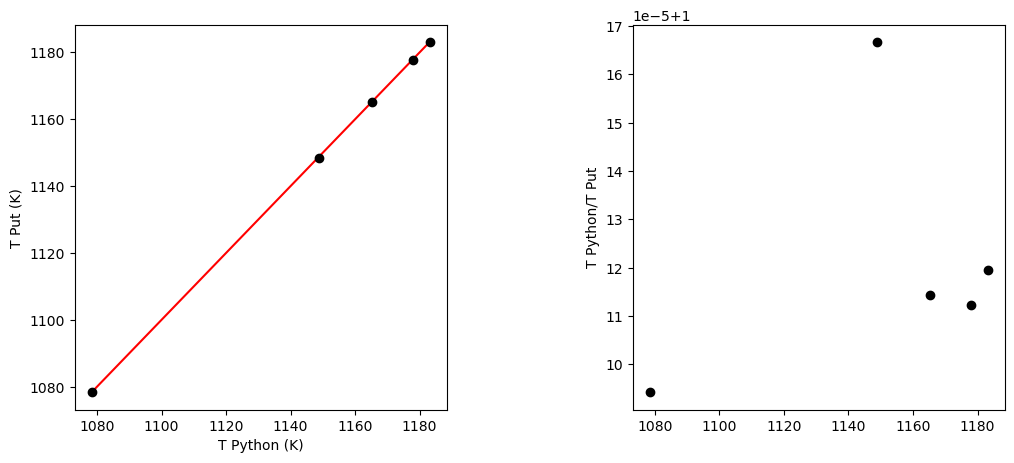

In [5]:

T_py=T_pyy['T_K_calc']
T_Put=my_input['Temp_2017Calculator'] 
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py/T_Put, 'ok')
ax2.set_ylabel('T Python/T Put')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

In [6]:
T_pyy=pt.calculate_ol_liq_temp(liq_comps=myLiquids2, ol_comps=myOls2, equationT="T_Pu2017", P=0)-273.15
T_pyy

# 1183.209886

Youve selected a P-independent function


,T_K_calc,Kd (Fe-Mg) Meas
0,1183.209886,-272.908818
1,1177.852143,-272.965682
2,1148.741156,-272.995609
3,1165.235948,-273.026287
4,1078.424411,-272.989939


In [7]:
myLiquids2

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,57.023602,0.623106,16.332899,4.36174,0.103851,4.19180,6.94858,3.59702,0.896895,0,0.226584,0.0,0.0,0.019089,0.0,0.0,0
1,57.658600,0.654150,17.194799,3.90621,0.084105,2.86892,5.91538,3.85948,1.018600,0,0.214935,0.0,0.0,0.022907,0.0,0.0,1
2,60.731201,0.862054,17.144199,4.07781,0.077488,2.50867,5.22075,4.45556,1.414160,0,0.319638,0.0,0.0,0.024179,0.0,0.0,2
3,61.532799,0.440860,16.508801,3.32990,0.037520,1.64150,4.34294,4.40860,1.407000,0,0.215740,0.0,0.0,0.025452,0.0,0.0,3
4,52.969101,0.803412,17.563000,5.93217,0.149472,3.78351,7.65110,3.80219,0.551178,0,0.196182,0.0,0.0,0.031815,0.0,0.0,4
